# Introduction

camden is an esthablished online retail store that sells a wide range of products, including fashion, acessories, 
and home decor. However in recent months, the store has experienced fluntuating sales performance, and the management
wants to gain a deeper understanding of the underlying trends by leveraging the available data.

Task Brief:
As a data analyst, your tasks involve analyzing the sales data of Camden, an established online retail store, to gain a deeper understanding of the fluctuating sales performance. The management has provided you with the available data, and your objective is to identify the underlying trends and patterns. Here are the tasks:

1. Data Gathering: Collect and obtain the sales data from Camden's records or database. Ensure that the data covers a sufficient period, preferably several months, to capture seasonal and long-term trends.

2. Data Cleaning: Preprocess the sales data to handle any missing or erroneous values. Remove duplicates, correct data entry errors, and ensure consistency in the data format.

3. Exploratory Data Analysis (EDA): Conduct an initial analysis of the sales data to explore key trends, patterns, and insights. Visualize the data using various charts and graphs to identify any apparent fluctuations in sales performance over time.

4. Product Sales Analysis: Determine which products sell the most by analyzing sales data for each product category. Identify the top-selling products that significantly contribute to overall revenue.

4. Monthly Sales Analysis: Aggregate the sales data on a monthly basis and calculate total sales for each month. Visualize the monthly sales using line charts or bar graphs to identify any recurring patterns or seasonal variations.

5. Seasonal Analysis: Conduct a seasonal analysis to determine if certain months or seasons consistently experience higher or lower sales.

6. Customer Contribution to Sales: Conduct an in-depth analysis of customer purchase patterns to pinpoint the primary drivers of revenue and identify the most impactful customers. This examination will provide valuable insights into the extent to which certain customers influence the fluctuations in sales and highlight potential avenues for enhancing customer retention and driving revenue growth.


7. Country Sales Analysis: Analyze sales data by country to identify the country or countries that contribute the most to total sales. Determine if certain regions have a substantial impact on the store's revenue.

7. Recommendations: Based on the analysis results, provide actionable recommendations to the management to improve sales performance. Suggest strategies to capitalize on peak periods and mitigate any negative impacts during low sales months.

8. Visualization and Reporting: Create visually appealing and informative reports summarizing the findings. Use appropriate data visualization techniques to present the analysis in a clear and compelling manner.

By completing these tasks, you will help Camden's management gain valuable insights into the sales performance trends and make informed decisions to enhance their business strategies.

In [142]:
#importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import warnings
warnings.filterwarnings("ignore")
import matplotlib.ticker as ticker
import calendar

In [2]:
df = pd.read_excel('/Users/admin/Downloads/Fayden Online Retail Store.xlsx')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Fayden Online Store,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom


In [5]:
# A quick glance at the head() shows that there are a few adjustment to be made to the first three columns
#lets drop the rows with the nan values


df = df.drop(index=[0, 1, 2])


In [6]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Fayden Online Store,Unnamed: 5,Unnamed: 6,Unnamed: 7
3,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
5,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
6,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
7,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


# Data cleaning and Exploratory Data Analysis

In [7]:
#lets make the first column the header

df.columns = df.loc[3, :]

df = df.drop(index=[3])

In [8]:
df.head()

3,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
5,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
6,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
7,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
8,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [12]:
#checking for missing values in the data 
df.isnull().sum()

3
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 4 to 406832
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  object        
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  object        
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
 8   month        406829 non-null  category      
dtypes: category(1), datetime64[ns](1), object(7)
memory usage: 44.4+ MB


In [13]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

# Product Sales Analysis

my task is to determine which products sell the most by analyzing sales data for each product category. Identify the top-selling products that significantly contribute to overall revenue.

In [9]:
print(df['Description'].value_counts())

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: Description, Length: 3896, dtype: int64


In [10]:
#lets find out which of the products is being ordered the most
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(top_products)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS      53215
JUMBO BAG RED RETROSPOT                45066
ASSORTED COLOUR BIRD ORNAMENT          35314
WHITE HANGING HEART T-LIGHT HOLDER     34147
PACK OF 72 RETROSPOT CAKE CASES        33409
                                       ...  
PINK POODLE HANGING DECORATION           -12
CRUK Commission                          -16
ASSORTED TUTTI FRUTTI ROUND BOX          -24
Discount                               -1194
ROTATING SILVER ANGELS T-LIGHT HLDR    -1460
Name: Quantity, Length: 3896, dtype: object


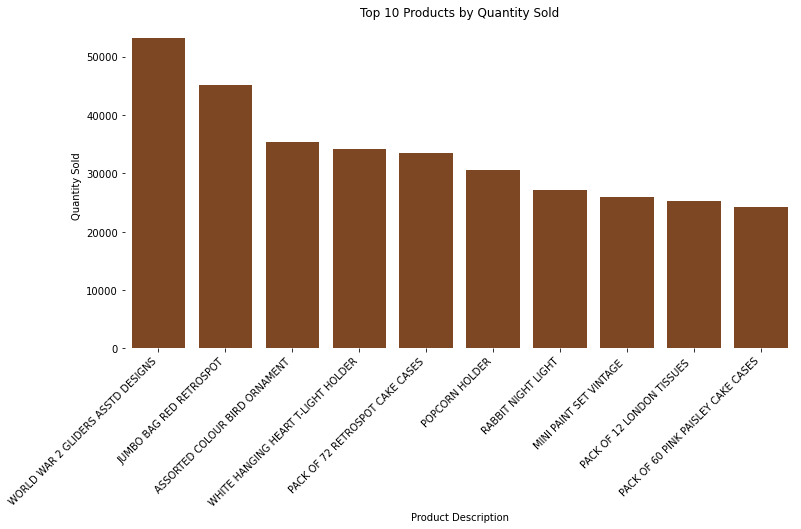

In [137]:
#Select the top N products you want to plot (e.g., top 10)
top_n = 10
top_products = top_products.head(top_n)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_products.index, y=top_products.values, color= '#8B4513')
ax.set_xlabel('Product Description')
ax.set_ylabel('Quantity Sold')
ax.set_title('Top 10 Products by Quantity Sold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()

# Country Sales Analysis 

The task is to analyze sales data by country to identify the country or countries that contribute the most to total sales. Determine if certain regions have a substantial impact on the store's revenue.


In [14]:
print(df['Country'].value_counts())

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [ ]:
#from the above value count it is clear that a huge percentage of our customer base comes from the united kingdom
#lets create a visualization plot.

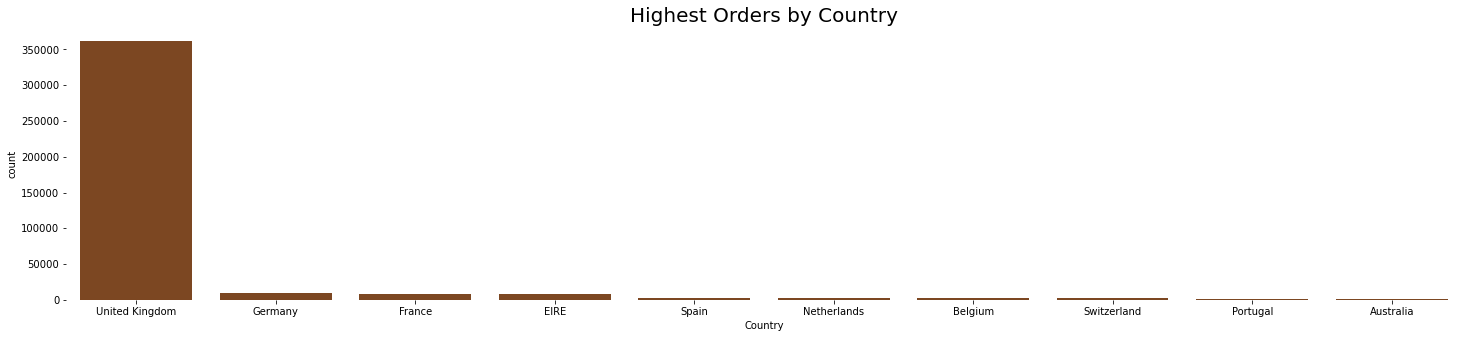

In [143]:
top_countries = df['Country'].value_counts().nlargest(10).index

plt.figure(figsize=(25, 5))
sns.countplot(df['Country'], order=top_countries, color = '#8B4513')
plt.title('Highest Orders by Country', fontsize=20)
plt.show()

In [42]:
df.CustomerID.unique()

array([17850, 13047, 12583, ..., 13298, 14569, 12713], dtype=object)

In [43]:
print(df['CustomerID'].value_counts())

17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
         ... 
15070       1
15753       1
17065       1
16881       1
16995       1
Name: CustomerID, Length: 4372, dtype: int64


# Customer Contribution to Sales

The task is to conduct an in-depth analysis of customer purchase patterns to pinpoint the primary drivers of revenue and identify the most impactful customers.

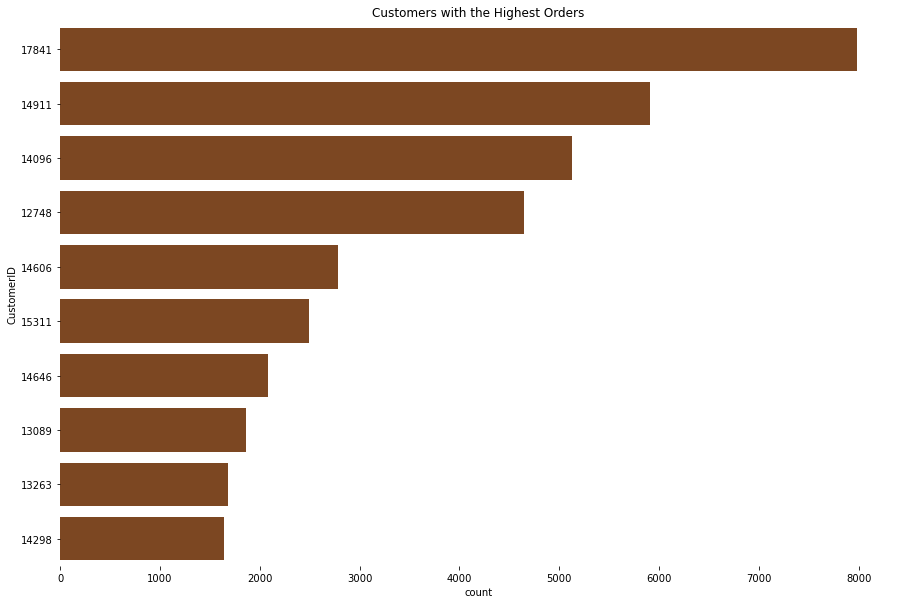

In [139]:


plt.figure(figsize=(15, 10))
ax = sns.countplot(y='CustomerID', data=df, order=df['CustomerID'].value_counts().iloc[:10].index, color = '#8B4513')
ax.set_title('Customers with the Highest Orders')
plt.show()

# Monthly sales analysis analysis

-Aggregate the sales data on a monthly basis and calculate total sales for each month. Visualize the monthly sales using line charts or bar graphs to identify any recurring patterns or seasonal variations.


In [19]:
print(df['InvoiceDate'].value_counts())

2011-11-14 15:27:00    543
2011-11-28 15:54:00    534
2011-12-05 17:17:00    530
2011-11-23 13:39:00    444
2011-10-31 14:09:00    436
                      ... 
2011-11-15 10:54:00      1
2011-04-08 13:20:00      1
2011-09-15 17:02:00      1
2011-09-15 16:57:00      1
2011-03-21 11:02:00      1
Name: InvoiceDate, Length: 20460, dtype: int64


In [84]:
# Convert 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y')

# Create a new column with abbreviated month names
df['month'] = df['InvoiceDate'].dt.strftime('%b')

# Convert the 'month' column to categorical with ordered categories
df['month'] = pd.Categorical(df['month'], categories=calendar.month_abbr[1:], ordered=True)

# Check the unique values in the 'month' column
unique_months = df['month'].unique()
print(unique_months)

['Dec', 'Jan', 'Feb', 'Mar', 'Apr', ..., 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
Length: 12
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']


In [26]:
df['InvoiceDate']

4        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
7        2010-12-01 08:26:00
8        2010-12-01 08:26:00
                 ...        
406828   2011-12-09 12:50:00
406829   2011-12-09 12:50:00
406830   2011-12-09 12:50:00
406831   2011-12-09 12:50:00
406832   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [27]:
print(df['month'].value_counts()) 

Nov    65598
Oct    50695
Dec    44511
Sep    40822
May    28908
Jun    27836
Mar    27822
Aug    27662
Jul    27502
Apr    23198
Jan    21912
Feb    20363
Name: month, dtype: int64


In [28]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
monthly_sales = df.groupby('month')['TotalSales'].sum()

In [29]:
print(monthly_sales)

month
Jan     475074.38
Feb     436546.15
Mar     579964.61
Apr    426047.851
May     648251.08
Jun     608013.16
Jul    574238.481
Aug      616368.0
Sep    931440.372
Oct     974603.59
Nov    1132407.74
Dec      897110.4
Name: TotalSales, dtype: object


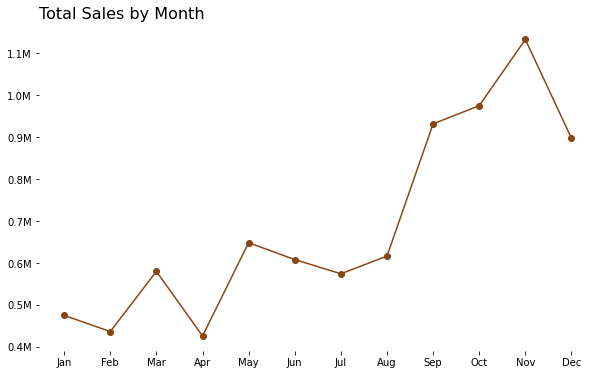

In [140]:
figure, ax = plt.subplots(figsize=(10, 6))
ax.plot(monthly_sales.sort_index(), linestyle='-', marker='o', color='#8B4513')
ax.set_title('Total Sales by Month', fontsize=16, loc='left')
ax.set_xticks(np.arange(len(monthly_sales)))
ax.set_xticklabels(monthly_sales.index)

# Format y-axis labels to display in millions
formatter = ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M')
ax.yaxis.set_major_formatter(formatter)

ax.tick_params(axis='x', rotation=0)
plt.show()

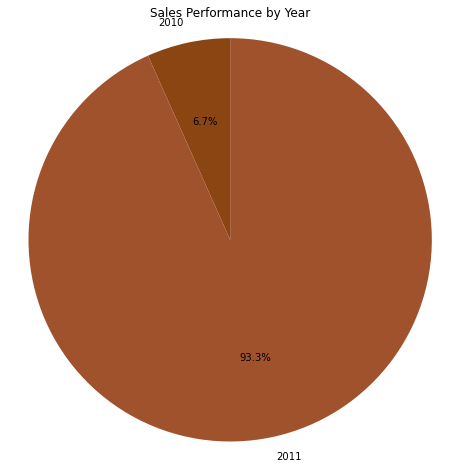

In [141]:
yearly_sales = df.groupby(df['InvoiceDate'].dt.year)['TotalSales'].sum()

colors = ['#8B4513', '#A0522D']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%', startangle=90, colors= colors)
plt.title('Sales Performance by Year')

plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

plt.show()

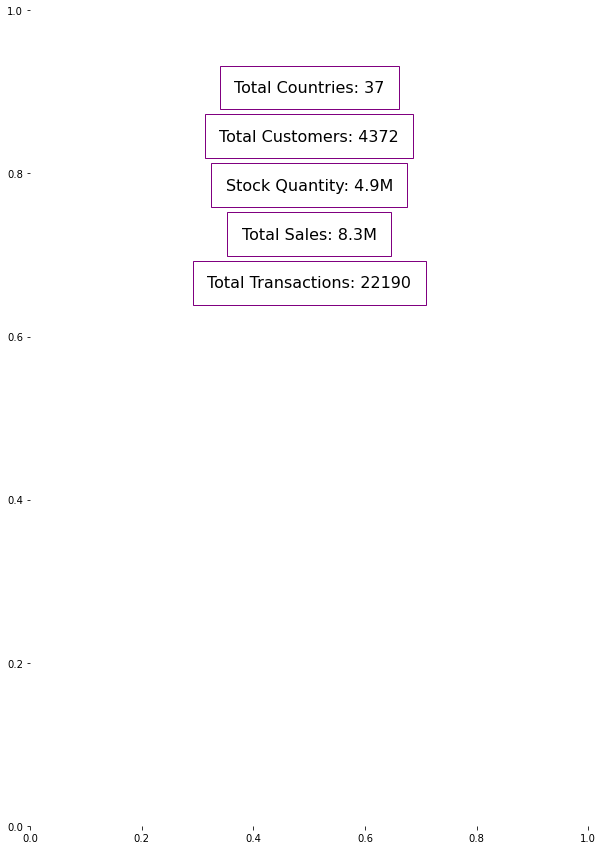

In [85]:
# Calculate summary values
total_countries = df['Country'].nunique()
total_customers = df['CustomerID'].nunique()
total_stock_quantity = df['Quantity'].sum()
total_sales = df['TotalSales'].sum()
total_transactions = df['InvoiceNo'].nunique()

# Create the Figure object
fig = plt.figure(figsize=(10, 15))


# Total Countries
plt.text(0.5, kpi_y, f'Total Countries: {total_countries}', fontsize=16, ha='center', bbox=dict(boxstyle='square', fc='white', ec='purple', lw=1, pad=0.9))
plt.text(0.5, kpi_y - kpi_spacing, f'Total Customers: {total_customers}', fontsize=16, ha='center', bbox=dict(boxstyle='square', fc='white', ec='purple', lw=1, pad=0.9))
plt.text(0.5, kpi_y - 2 * kpi_spacing, f'Stock Quantity: {total_stock_quantity / 1e6:.1f}M', fontsize=16, ha='center', bbox=dict(boxstyle='square', fc='white', ec='purple', lw=1, pad=0.9))
plt.text(0.5, kpi_y - 3 * kpi_spacing, f'Total Sales: {total_sales / 1e6:.1f}M', fontsize=16, ha='center', bbox=dict(boxstyle='square', fc='white', ec='purple', lw=1, pad=0.9))
plt.text(0.5, kpi_y - 4 * kpi_spacing, f'Total Transactions: {total_transactions}', fontsize=16, ha='center', bbox=dict(boxstyle='square', fc='white', ec='purple', lw=1, pad=0.9))
plt.show()


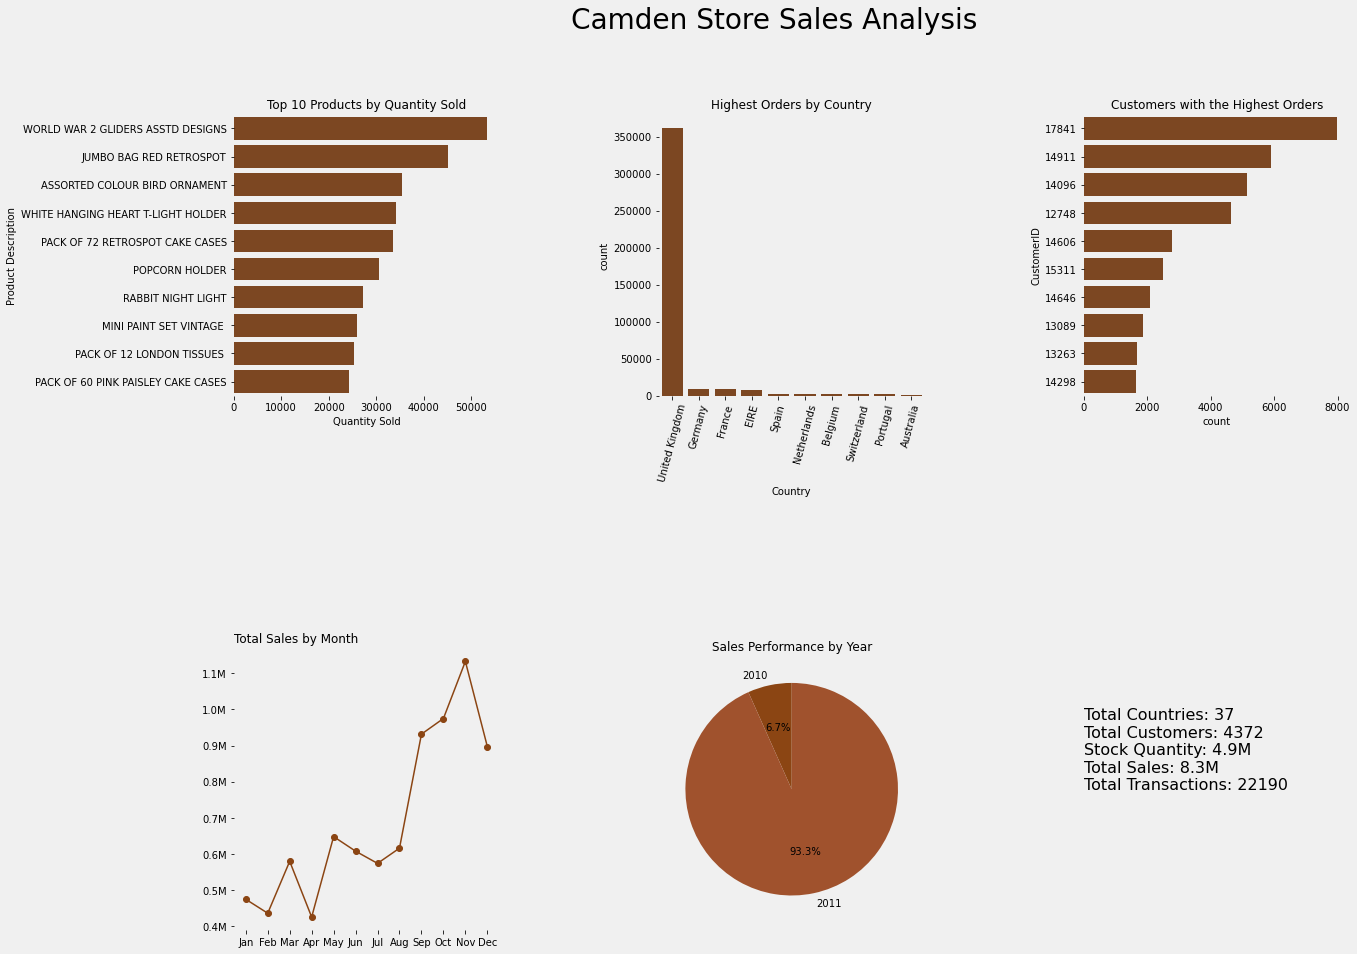

In [134]:
# Create the Figure object with a light gray background
fig = plt.figure(figsize=(20, 15), facecolor='#f0f0f0')  # Light gray background

# Define a color for the dashboard (shades of brown)
dashboard_color = '#8B4513'  # Brown color

# Top 10 Products by Quantity Sold - Bar plot using Seaborn
ax1 = fig.add_subplot(231, facecolor='#f0f0f0')  
ax1 = sns.barplot(x=top_products.values, y=top_products.index, palette=[dashboard_color])
ax1.set_xlabel('Quantity Sold')
ax1.set_ylabel('Product Description')
ax1.set_title('Top 10 Products by Quantity Sold')

# Adjust y-axis labels for better alignment
ax1.set_yticklabels(top_products.index)

# Highest orders by country
ax2 = fig.add_subplot(232, facecolor='#f0f0f0')  
sns.countplot(df['Country'], order=top_countries, palette=[dashboard_color], ax=ax2)
ax2.set_title('Highest Orders by Country')
ax2.tick_params(axis='x', rotation=75)
ax2.set_xlabel('Country')

# Customers with the highest orders
ax3 = fig.add_subplot(233, facecolor='#f0f0f0')  
sns.countplot(y='CustomerID', data=df, order=df['CustomerID'].value_counts().iloc[:10].index, palette=[dashboard_color], ax=ax3)
ax3.set_title('Customers with the Highest Orders')

# Monthly sales
ax4 = fig.add_subplot(234, facecolor='#f0f0f0')  
ax4.plot(monthly_sales.sort_index(), linestyle='-', marker='o', color=dashboard_color)
ax4.set_title('Total Sales by Month', loc='left')
ax4.set_xticks(np.arange(len(monthly_sales)))
ax4.set_xticklabels(monthly_sales.index)

# Format y-axis labels to display in millions
formatter = ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M')
ax4.yaxis.set_major_formatter(formatter)
ax4.tick_params(axis='x', rotation=0)

# Sales performance by year - Pie chart
ax5 = fig.add_subplot(235, facecolor='#f0f0f0')  
yearly_sales = df.groupby(df['InvoiceDate'].dt.year)['TotalSales'].sum()
ax5.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%', startangle=90, colors=[dashboard_color, '#A0522D'])  # Two shades of brown
ax5.set_title('Sales Performance by Year')

# Add KPIs at the bottom of the dashboard
kpi_text = f'Total Countries: {total_countries}\nTotal Customers: {total_customers}\nStock Quantity: {total_stock_quantity / 1e6:.1f}M\nTotal Sales: {total_sales / 1e6:.1f}M\nTotal Transactions: {total_transactions}'
ax6 = fig.add_subplot(236, facecolor='#f0f0f0')  # Light gray background for this subplot
ax6.text(0, 0.5, kpi_text, fontsize=16, ha='left', color='black')
ax6.axis('off')

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.9, wspace=0.6)

# Add overall title to the Dashboard
fig.suptitle('Camden Store Sales Analysis', fontsize=28, color="black")

# Display the Dashboard
plt.show()

Based on the analysis from the dashboard, we can draw the following observations:

1. **Geographical Sales Concentration:** The majority of our sales come from the United Kingdom. It appears to be our primary market, contributing significantly to overall revenue.

2. **Key Customers Driving Revenue:** Two customers with the ID numbers '17841' and '14911' stand out as our biggest buyers, significantly contributing to our revenue. Their repeat purchases and loyalty are valuable to the business.

3. **Monthly Sales Patterns:** We observed that sales were highest in November, suggesting a possible peak in demand during that month. However, there was a sharp downturn in sales during December, followed by relatively low sales in February and April.

4. **Top-Selling Products:** The products 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'JUMBO BAG RED RETROSPOT', and 'ASSORTED COLOUR BIRD ORNAMENT' emerged as the best-selling products, driving a substantial portion of our overall sales.

5. **Performance in 2011:** The dashboard indicates that 2011 showed the highest sales performance among the available data. However, due to incomplete data covering the previous year's sales, we cannot make a definitive conclusion about the year-over-year growth. Nevertheless, we can recognize the positive performance in 2011.

These observations provide valuable insights into our sales and customers' behavior, highlighting areas of strength and opportunities for improvement. It's important to continue monitoring trends and expanding the data scope to gain a more comprehensive understanding of our business performance.

Recommendations

1. **Focus on the United Kingdom Market**: *Since a bulk majority of sales come from the United Kingdom, it may be beneficial to focus on this market. This can include targeted marketing campaigns, special offers, or improving customer support to strengthen the brand's presence and customer loyalty in the UK.*


2. **Personalized Approach for Top Buyers**: *Customers with ID numbers '17841' and '14911' are significant buyers for your business. Consider adopting a personalized approach for these customers, such as offering exclusive deals, loyalty rewards, or personalized product recommendations based on their past purchases. Building strong relationships with these customers can lead to repeat business and positive word-of-mouth recommendations.*


3. **Analyze Sales Patterns in December, February, and April**: *Investigate the reasons behind the sharp downturn in sales in December, February, and April. Possible factors could include seasonality, holidays, or external events impacting consumer behavior. Use this analysis to plan targeted promotions, incentives, or new product launches during these periods to boost sales.*


4. **Diversify Product Offering**: *If sales fluctuations are heavily influenced by specific products, consider diversifying the product offering to reduce reliance on a few items. Market research and customer feedback can help identify new product opportunities that align with customer preferences and needs.*


5. **Improve Customer Retention Strategies**: *Focus on customer retention strategies to keep existing customers engaged and satisfied. This can include implementing loyalty programs, improving customer service, and seeking feedback to address any pain points.*


6. **Enhance Marketing Efforts**: *Invest in marketing efforts to attract new customers and increase brand visibility. This can include digital marketing, social media campaigns, influencer partnerships, and targeted advertisements to reach potential customers in different markets.*


7. **Data-Driven Decision Making**: *Continuously analyze sales data, customer behavior, and market trends to make data-driven decisions. Use insights from data analysis to identify opportunities and optimize business processes.*


8. **Explore International Expansion**: *If the business is primarily focused on the UK market, consider exploring opportunities for international expansion. Analyze market potential in other countries, assess logistics and regulatory considerations, and develop strategies to enter new markets.*


9. **Collaborations and Partnerships**: *Consider forming collaborations or partnerships with other businesses to expand customer reach and tap into new customer bases.*


Remember to tailor each solution to the specific needs and context of your business. Regularly monitor the impact of implemented strategies and be open to adapt based on market changes and customer feedback.